In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [26]:
df = pd.read_csv('/Users/shripadanantraobhole/Desktop/DataSets/chd-data.csv')
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df["education"] = imp.fit_transform(df[["education"]]).ravel()
most_frequent_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["cigsPerDay"] = most_frequent_imp.fit_transform(df[["cigsPerDay"]])
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df["BPMeds"] = mean_imp.fit_transform(df[["BPMeds"]]).ravel()
df["totChol"] = mean_imp.fit_transform(df[["totChol"]]).ravel()
df["BMI"] = mean_imp.fit_transform(df[["BMI"]]).ravel()
df["glucose"] = mean_imp.fit_transform(df[["glucose"]]).ravel()
df.dropna()
df = df[pd.notnull(df['heartRate'])]
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,0.429111,49.576787,1.980184,0.493984,8.942203,0.029622,0.005898,0.310451,0.025714,236.703698,132.345129,82.899623,25.799978,75.878981,81.961524,0.151687
std,0.495008,8.571091,1.007093,0.500023,11.905369,0.168500,0.076578,0.462733,0.158298,44.331917,22.027266,11.911182,4.070814,12.025348,22.834020,0.358759
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.075000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.025000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<IPython.core.display.Javascript object>


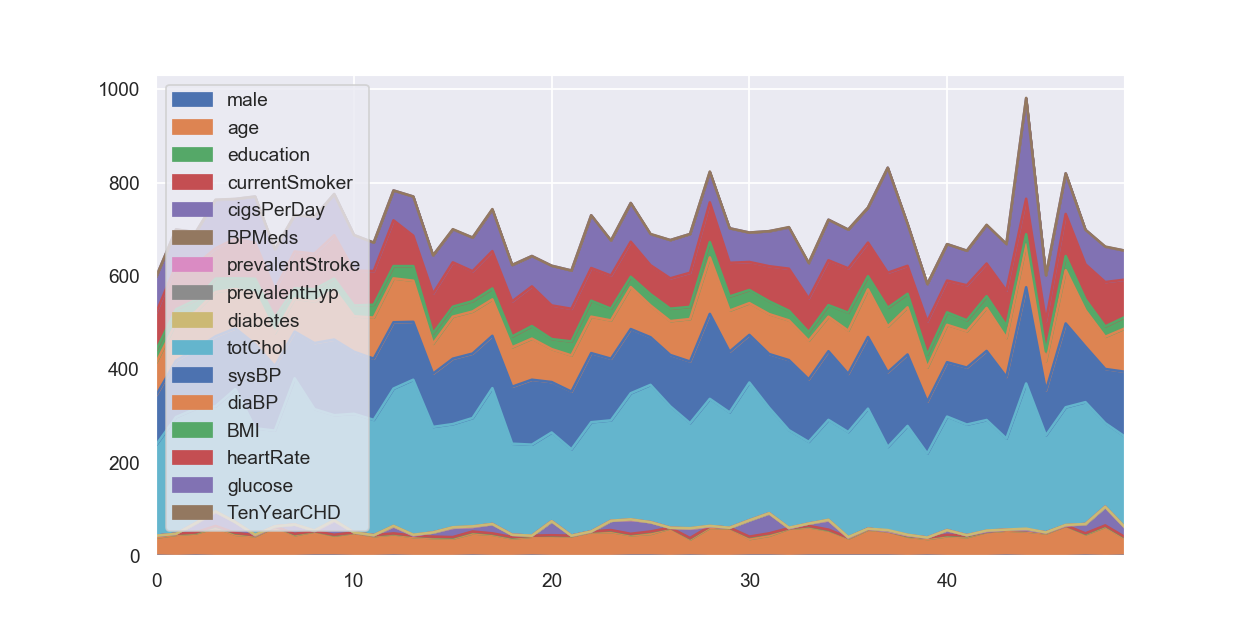

In [28]:
df.head(50).plot(kind='area',figsize=(10,5))

<IPython.core.display.Javascript object>


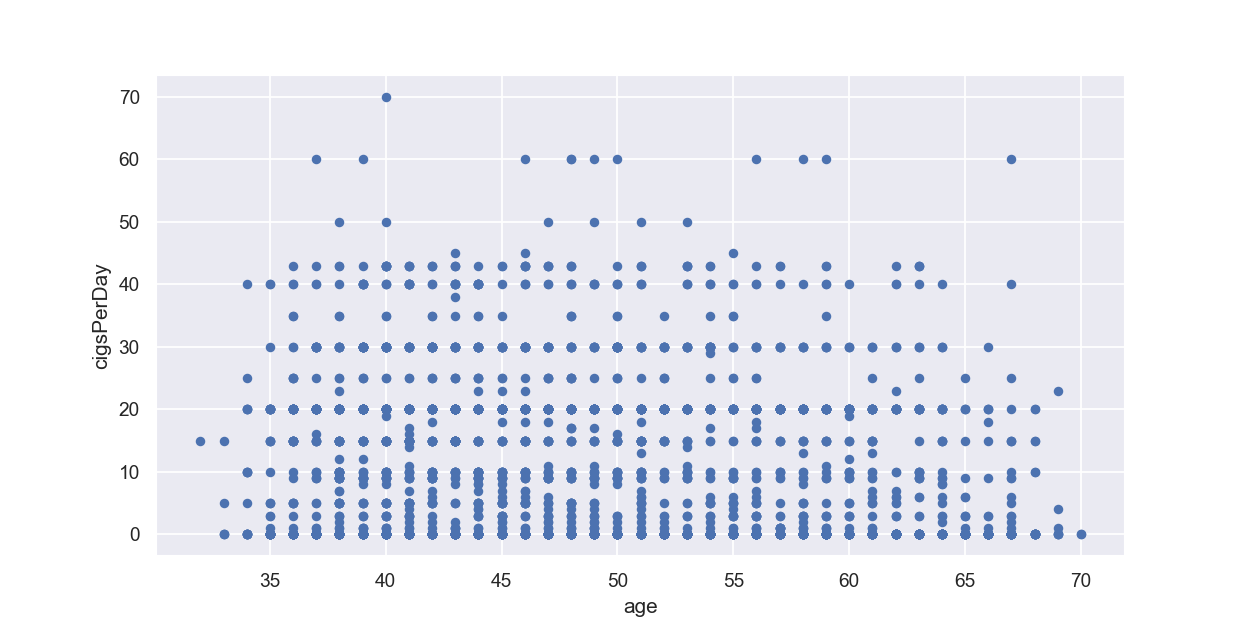

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [29]:
df.plot(x='age',y='cigsPerDay',kind='scatter',figsize =(10,5))

<IPython.core.display.Javascript object>


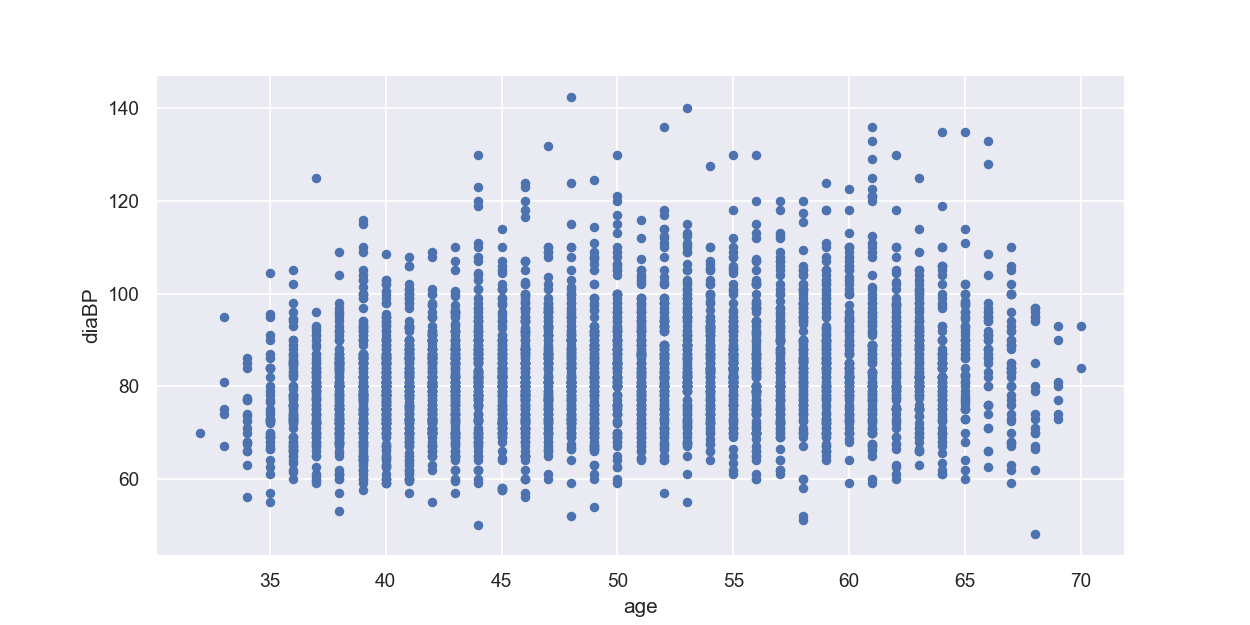

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [30]:
df.plot(x='age',y='diaBP',kind='scatter',figsize =(10,5))

<IPython.core.display.Javascript object>


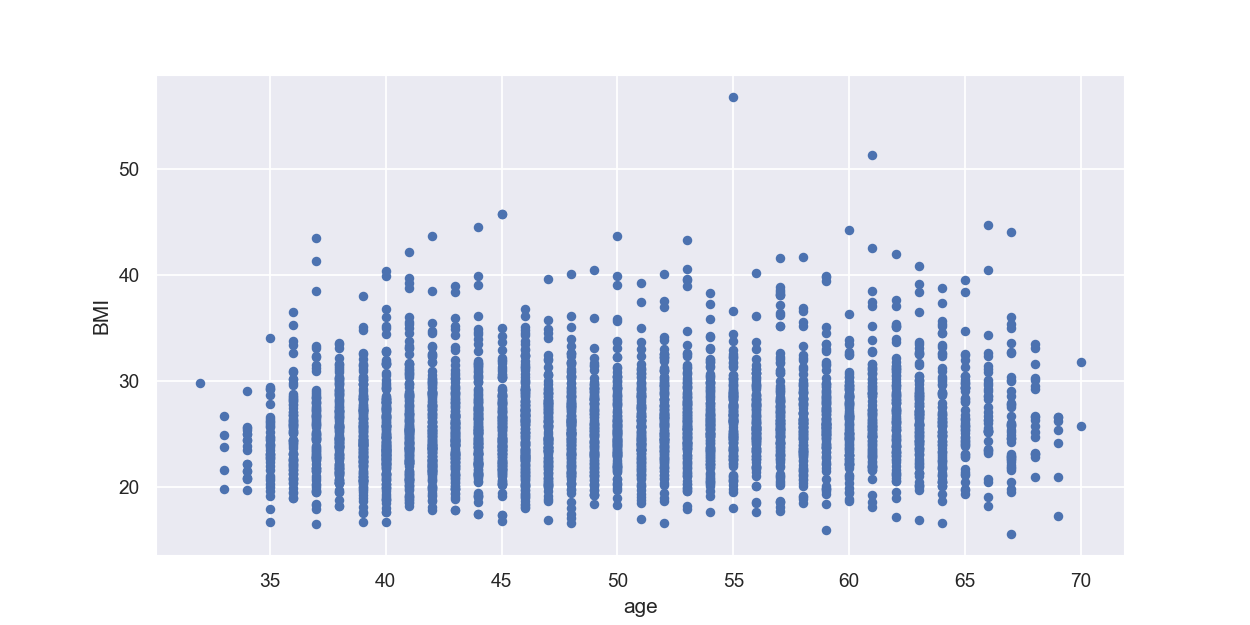

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [31]:
df.plot(x='age',y='BMI',kind='scatter',figsize =(10,5))

<IPython.core.display.Javascript object>


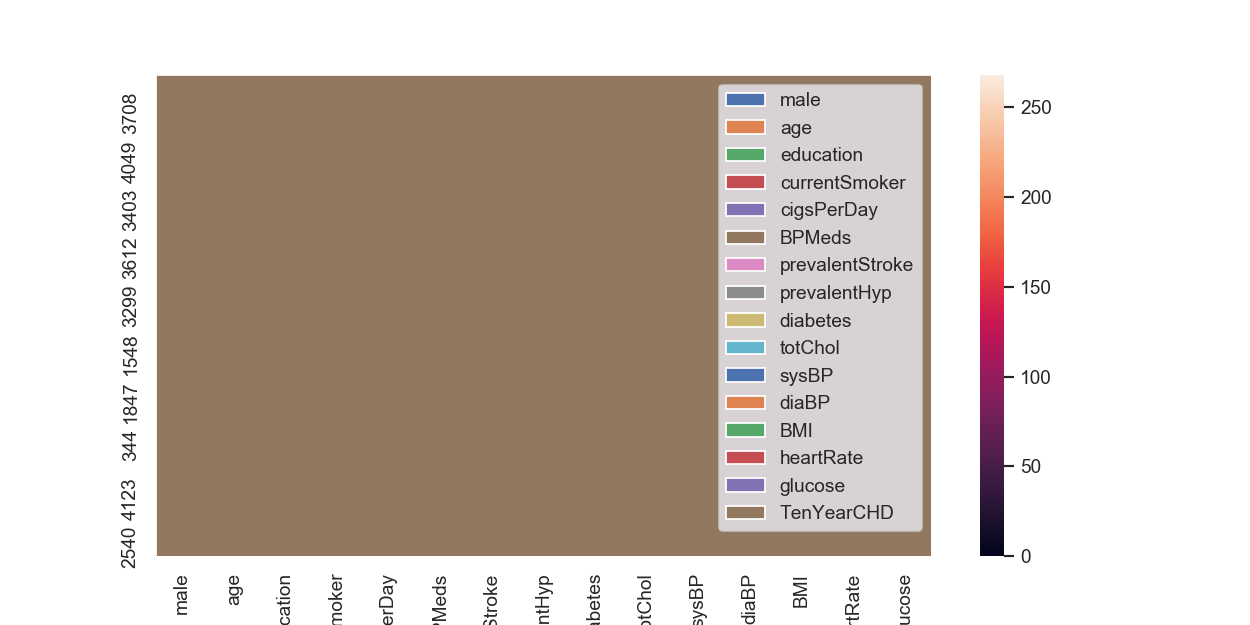

In [32]:
df.plot(kind = 'hist',figsize =(10,5))

In [33]:
# splitting the data into test and train  having a test size of 20% and 80% train size
from sklearn.model_selection import train_test_split
col = ['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
X_train, X_test, y_train, y_test = train_test_split(df[col], df['TenYearCHD'], test_size=0.3, random_state=124)
#X_test.dropna()

In [34]:
sns.set()
sns.heatmap(X_train.head(10),robust = True)

In [35]:
X_all = df[col]
y_all = df['TenYearCHD']

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = svclassifier.predict(X_test)
y_score = svclassifier.decision_function(X_test)

In [41]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.17
